# TTT4275 Classification Project: Music Genre Classification

## Setup

In [17]:
# Imports
import source.data_handling
import source.mappings
import source.plotting
import source.diy_classifiers

import numpy as np

In [18]:
# Load the dataset and split into training and test
# X = M x N dataset with M samples of N features

data_version = source.data_handling.GENRE_CLASS_DATA_30S
data_frame = source.data_handling.read_genre_class_data(data_version)

features = source.mappings.MUSIC_FEATURES_ALL

training_data, test_data = source.data_handling.prepare_data(
    data_frame=data_frame,
    features=features,
)

## Task 1

Using only the four features given in task 1a), we plot the confusion matrix and error rate for all genres.

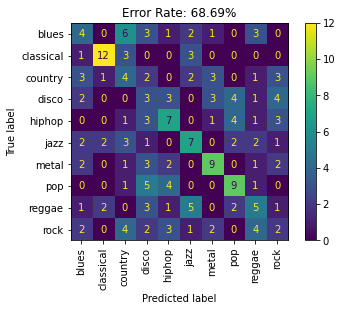

In [19]:
features_task_1 = ["spectral_rolloff_mean", "tempo", "spectral_centroid_mean", "mfcc_1_mean"]

training_data, test_data = source.data_handling.prepare_data(
    data_frame=data_frame,
    features=features_task_1,
)

y_pred_task1 = source.diy_classifiers.kNN(k=5, train_data=training_data, test_data=test_data, p=2)
y_true_task1 = test_data.y

source.plotting.confusion_matrix(y_true_task1, y_pred_task1)

### KNN Parameters
Using all features we plot the error rates with respect to the number of neighbors and using different orders of the Minkowski order (p).
Once for our own implementation of the kNN classifier

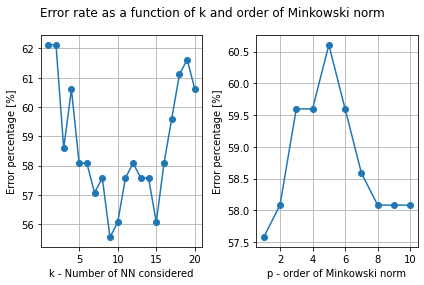

In [20]:
training_data, test_data = source.data_handling.prepare_data(
    data_frame=data_frame,
)

ks = np.arange(20) + 1
ps = np.arange(10) + 1

source.plotting.error_rates_vs_params(ks, ps, training_data, test_data, diy=True)

And another time for the sklearn implementation

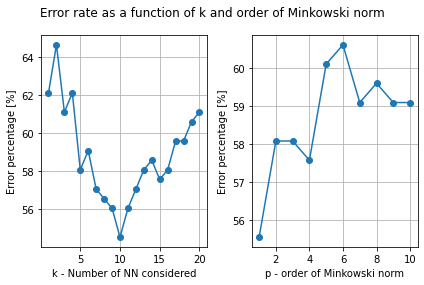

In [21]:
training_data, test_data = source.data_handling.prepare_data(
    data_frame=data_frame,
)

ks = np.arange(20) + 1
ps = np.arange(10) + 1

source.plotting.error_rates_vs_params(ks, ps, training_data, test_data, diy=False)

A larger number of neighbors to take into consideration could be beneficial when using KNN. Although the improvement is only small. Regarding the order of the Minkowski distance, interestingly the first order or Manhatten distance seems to perform the best and subsequent orders have worse error rates.
For both of these plots the improvement is not negligeable but small nonetheless.

## Task 2

In [22]:
features_task_2 = ["spectral_rolloff_mean", "tempo", "spectral_centroid_mean", "mfcc_1_mean"]
genres_task_2 = ["pop", "disco", "metal", "classical"]

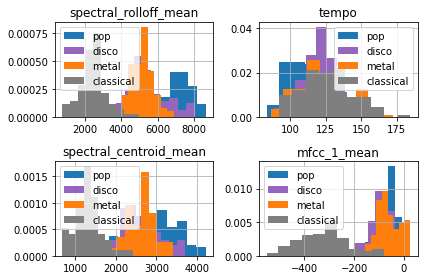

In [23]:
source.plotting.feature_distribution_histogram(
    data_frame=data_frame,
    features=features_task_2,
    genres=genres_task_2,
)

As the tempo feature seems to have the largest overlap between the classes, we remove that feature and run the knn classifier from task 1 for all genres again.

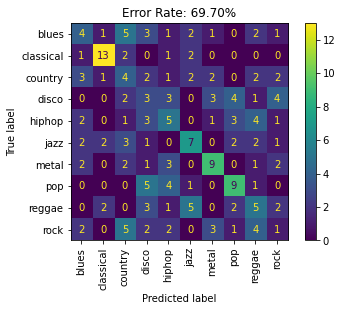

In [24]:
reduced_features_task_2 = ["spectral_rolloff_mean", "spectral_centroid_mean", "mfcc_1_mean"]

training_data, test_data = source.data_handling.prepare_data(
    data_frame=data_frame,
    features=reduced_features_task_2,
)

y_pred_task1 = source.diy_classifiers.kNN(train_data=training_data, test_data=test_data, k=5, p=2)
y_true_task1 = test_data.y

source.plotting.confusion_matrix(y_true_task1, y_pred_task1)

For whatever reason removing the tempo does not seem to have a valueable impact on the error rate of the classifier.

Using only one of the features we run the classifier and for the four genres and take a look at the performance.

spectral_rolloff_mean


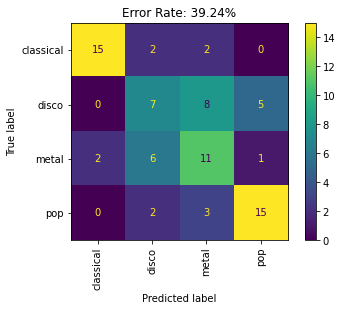

tempo


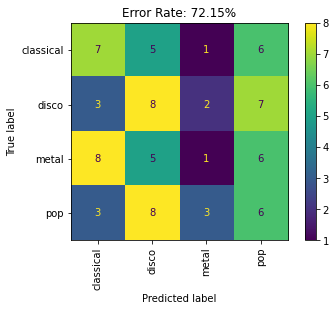

spectral_centroid_mean


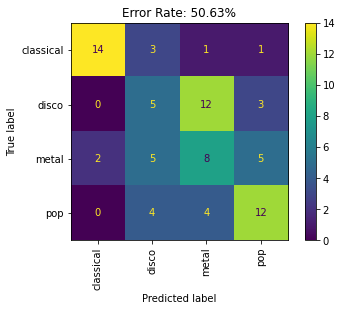

mfcc_1_mean


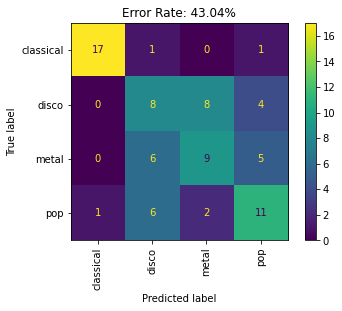

In [25]:
for feature in features_task_2:
    training_data, test_data = source.data_handling.prepare_data(
        data_frame=data_frame,
        features=[feature],
        genres=genres_task_2,
    )

    y_pred_task1 = source.diy_classifiers.kNN(train_data=training_data, test_data=test_data, k=5, p=2)
    y_true_task1 = test_data.y
    
    print(f"{feature}")
    source.plotting.confusion_matrix(y_true_task1, y_pred_task1)

## Task 3

In [26]:
# Crazy code

## Task 4

In [27]:
# Crazy code